In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score
import warnings

In [25]:
# Retirando a exibição dos warnings
warnings.filterwarnings('ignore')

In [2]:
# importando a base de dados
df = pd.read_csv('dados_produtos.csv')

In [3]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [5]:
df.describe() # exibe as estatísticas dos dados

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


<Axes: xlabel='product_name', ylabel='rating'>

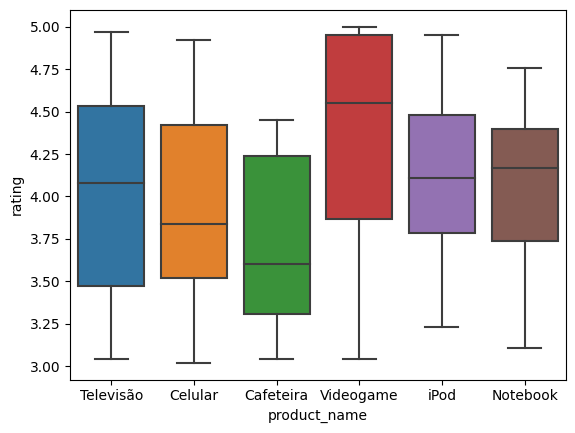

In [6]:
# Análise com box plot 
sns.boxplot(x=df['product_name'],y=df['rating'])

In [7]:
df.isnull().sum() # verificando se tem valores que sao nulos

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [8]:
df.isna().sum() # verificando se tem valores que não são numeros

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [9]:
# selecionando apenas as colunas numericas do dataframe
col_n = df.select_dtypes(include='number') # 

In [11]:
correlacao = col_n.corr()
correlacao

,rating,rating_count,purchased
rating,1.000000,0.051993,0.032637
rating_count,0.051993,1.000000,0.129694
purchased,0.032637,0.129694,1.000000


<Axes: >

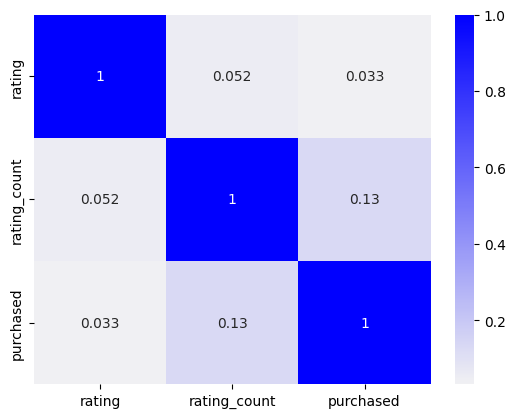

In [12]:
# plotando o grafico de correlação
color = sns.color_palette('light:blue',as_cmap=True)
sns.heatmap(correlacao,cmap=color,annot=True) # plota a matriz de correlação

Árvore de decisão para o produto Televisão 

Acurácia: 0.5 
 
Recall: 0.3333333333333333 
 
Precision: 1.0 
 
F1_score: 0.5 
 
Árvore de decisão para o produto Celular 

Acurácia: 0.6 
 
Recall: 1.0 
 
Precision: 0.5 
 
F1_score: 0.6666666666666666 
 
Árvore de decisão para o produto Cafeteira 

Acurácia: 0.5 
 
Recall: 0.0 
 
Precision: 0.0 
 
F1_score: 0.0 
 
Árvore de decisão para o produto Videogame 

Acurácia: 1.0 
 
Recall: 1.0 
 
Precision: 1.0 
 
F1_score: 1.0 
 
Árvore de decisão para o produto iPod 

Acurácia: 0.25 
 
Recall: 0.0 
 
Precision: 0.0 
 
F1_score: 0.0 
 
Árvore de decisão para o produto Notebook 

Acurácia: 0.75 
 
Recall: 1.0 
 
Precision: 0.5 
 
F1_score: 0.6666666666666666 
 


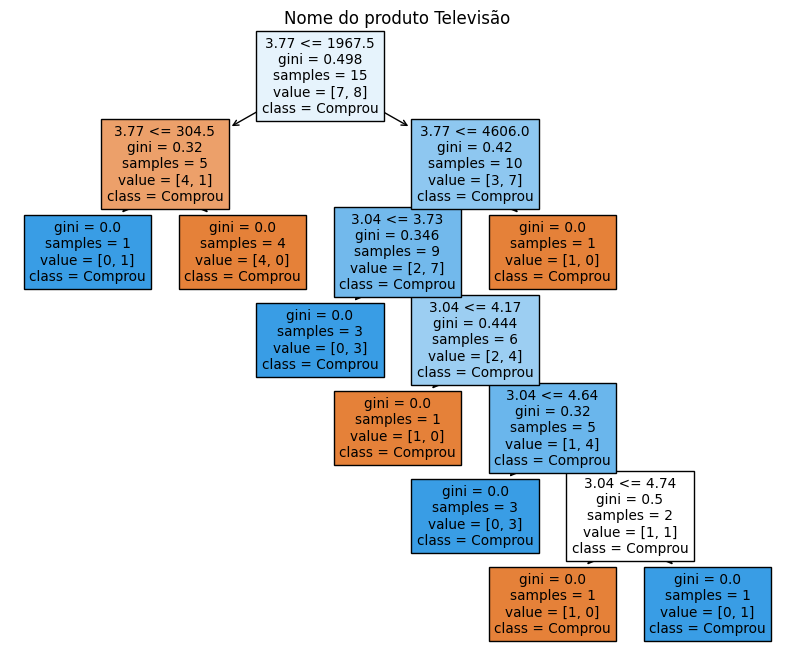

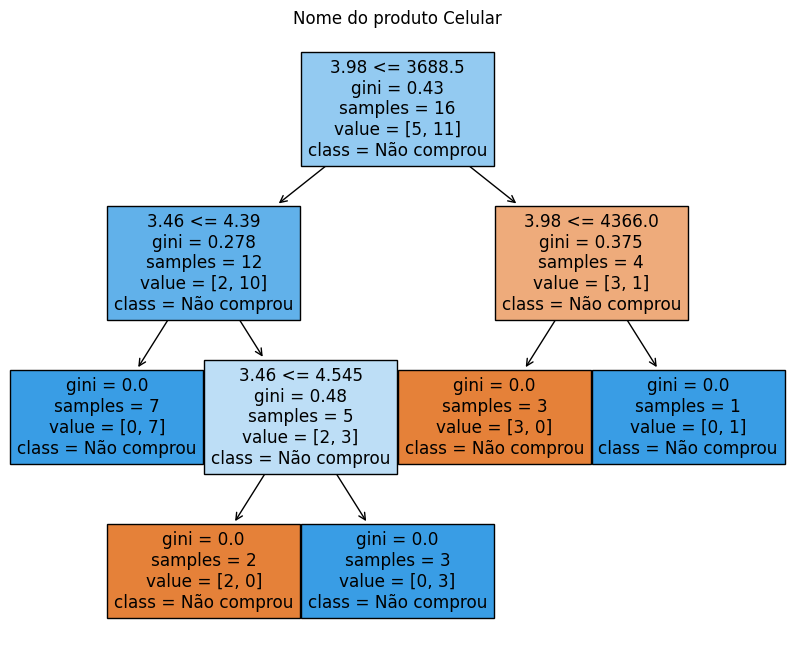

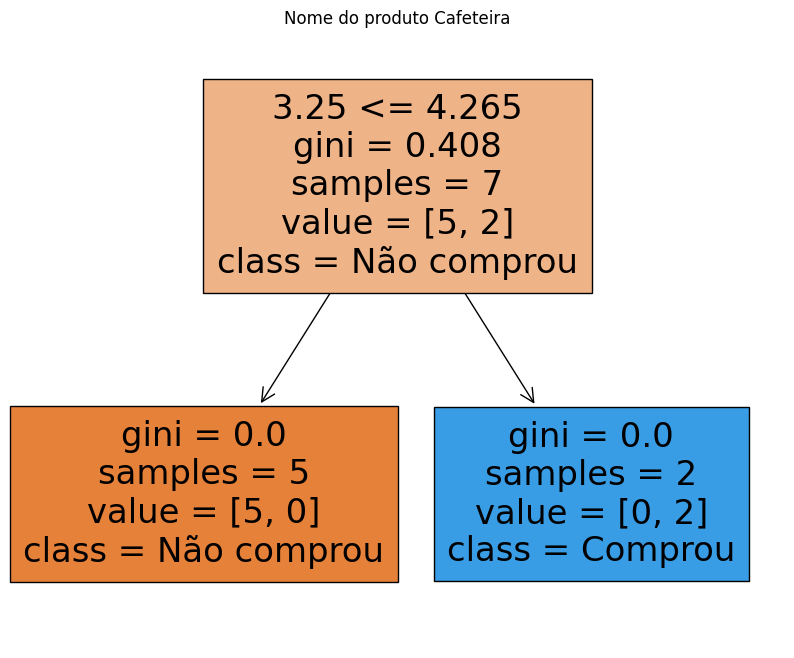

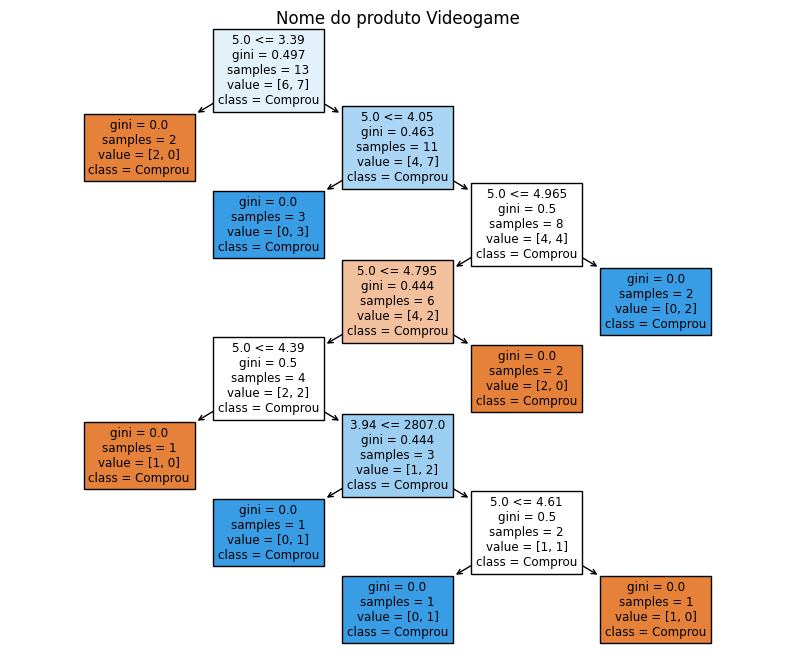

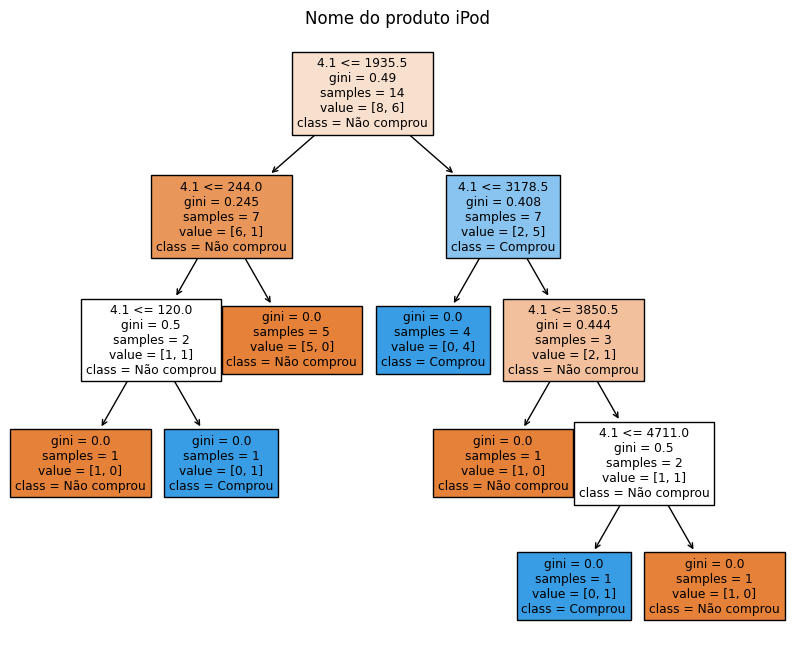

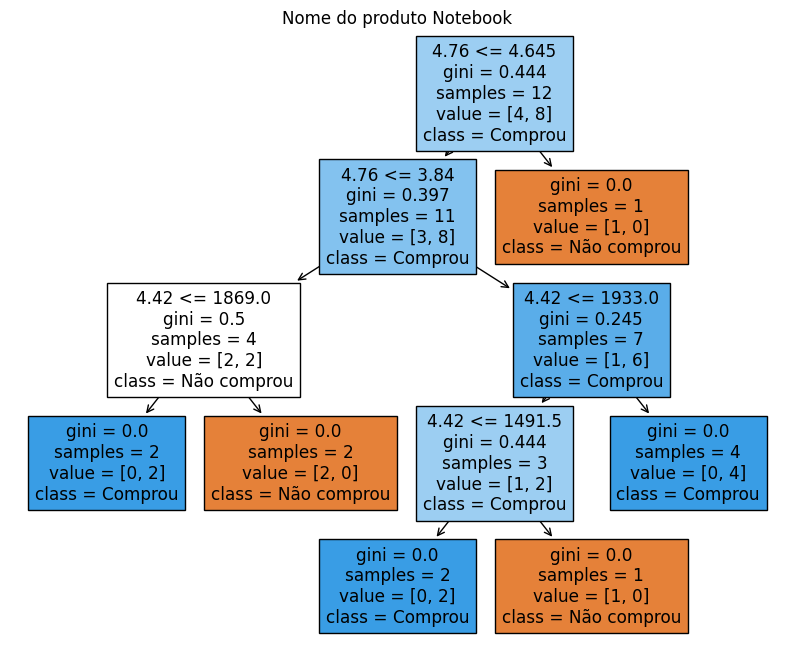

In [26]:
# Criando um filtro para plotar uma arvore de decisão para cada produto

produtos = df['product_name'].unique() # armazena cada linha do dataset em uma lista
# Selecionando os dados do dataset
for produto in produtos:
    produto_df= df.loc[df['product_name']==produto]
    X = produto_df.drop(['product_name','purchased'],axis=1) 
    y = produto_df['purchased']
    
# Dividindo os dados em treino e teste
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)
# Criando o modelo de Machine Learning
    modelo = DecisionTreeClassifier()
    modelo.fit(X_train,y_train) # treinando o modelo criado
    ypred = modelo.predict(X_test)

# Plotando as metricas do modelo
    print(f'Árvore de decisão para o produto {produto} \n')
    print(f'Acurácia: {accuracy_score(y_test,ypred)} \n ')
    print(f'Recall: {recall_score(y_test,ypred)} \n ') 
    print(f'Precision: {precision_score(y_test,ypred)} \n ')  
    print(f'F1_score: {f1_score(y_test,ypred)} \n ')
# Substitui 0 e 1 por comprou e não comprou
    produto_df['purchased'] =produto_df['purchased'].replace([1,0],['Comprou','Não comprou'])

    # plotando a arvore de decisão
    figure = plt.figure(figsize=(10,8))
    
    tree.plot_tree(modelo,feature_names=produto_df['rating'].tolist(),
               class_names=produto_df['purchased'].tolist(),filled=True)
    plt.title(f'Nome do produto {produto}')

In [17]:
produtos

array(['Televisão', 'Celular', 'Cafeteira', 'Videogame', 'iPod',
       'Notebook'], dtype=object)

In [27]:
# Análise exploratória - agrupamento das notas dos produtos

notasprodutos = df.groupby('product_name')['rating'].mean().reset_index()

In [28]:
notasprodutos

,product_name,rating
0,Cafeteira,3.747778
1,Celular,3.949524
2,Notebook,4.074375
3,Televisão,4.002632
4,Videogame,4.314118
5,iPod,4.135556


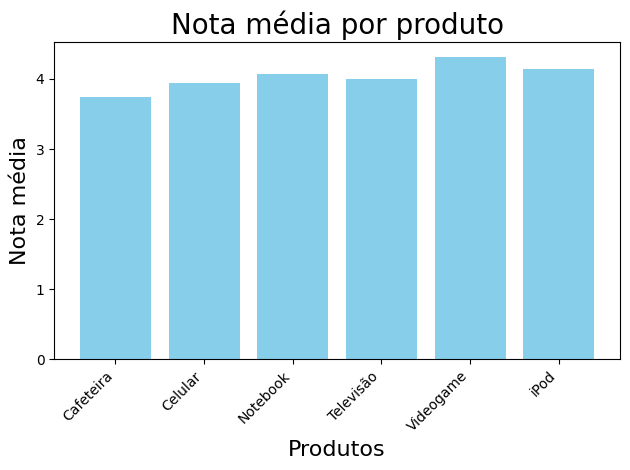

In [29]:
# Plotando um gráfico de barras com as notas medias para cada produto

notasprodutos.columns=['Produto','Nota média']
# Criando o gráfico
plt.bar(notasprodutos['Produto'],notasprodutos['Nota média'],color='skyblue')
plt.xlabel('Produtos',fontsize=16)
plt.ylabel('Nota média',fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.title('Nota média por produto',fontsize=20)
plt.tight_layout() # Ajusta o layout do gráfico para não haver sobreposição
plt.show()


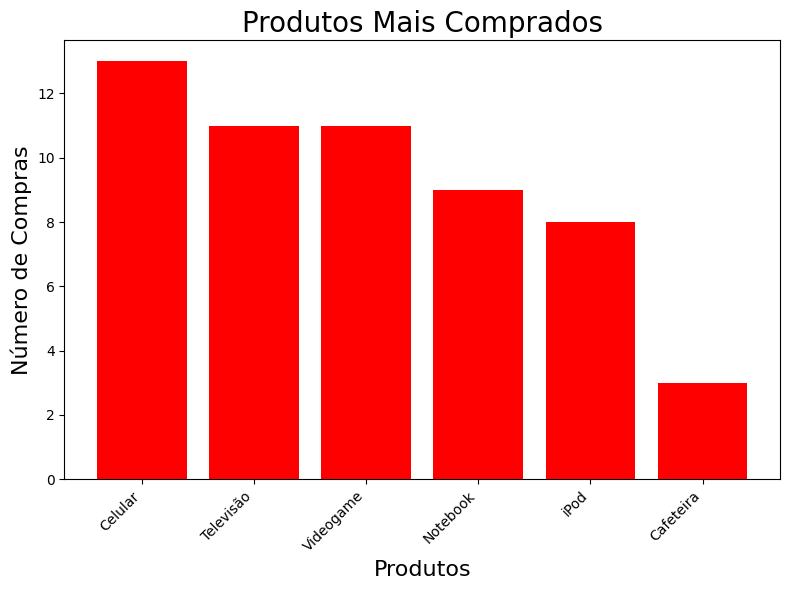

In [30]:
# Calculando os produtos mais comprados
produtos_comprados = df[df['purchased'] == 1] # cria um filtro para calcular os produtos mais comprados

contagem_produtos = produtos_comprados['product_name'].value_counts().reset_index()

# Renomear colunas
contagem_produtos.columns = ['Produto', 'Contagem']

# Criar gráfico
plt.figure(figsize=(8, 6))
plt.bar(contagem_produtos['Produto'], contagem_produtos['Contagem'], color='red')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Número de Compras', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Produtos Mais Comprados", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

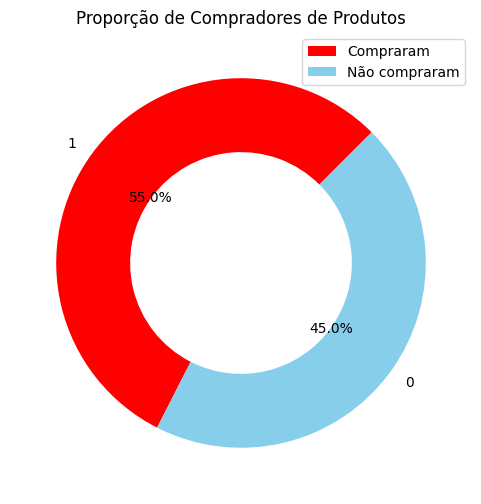

In [32]:

# Calcular a proporção de compradores
proporcao_compradores = df['purchased'].value_counts(normalize=True)

# Cores para o gráfico de pizza
cores_invertidas = ['red', 'skyblue']

# Visualização
plt.figure(figsize=(6, 6))
plt.pie(proporcao_compradores, labels=proporcao_compradores.index, autopct='%1.1f%%',
        startangle=45, colors=cores_invertidas, wedgeprops=dict(width=0.4))
plt.title('Proporção de Compradores de Produtos')
plt.legend(['Compraram', 'Não compraram'], loc='upper right')
plt.show()